# Using keras for the House prices Kaggle challenge

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 100)

Creating datasets

In [3]:
X_train_full = pd.read_csv('./sources/train.csv')
X_test = pd.read_csv('./sources/test.csv')

In [4]:
Y_test = pd.DataFrame()
Y_test['Id'] = (X_test['Id'])
Y_test

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


Feature engineering

In [5]:
X_train_full.fillna(0)
X_train_full['SurfaceTot'] = X_train_full['TotalBsmtSF'] + X_train_full['GrLivArea']
X_train_full = X_train_full.drop(X_train_full[(X_train_full['SurfaceTot'] > 7000)].index).reset_index(drop=True)

In [6]:
X_test.fillna(0)
X_test['SurfaceTot'] = X_test['TotalBsmtSF'] + X_test['GrLivArea']

Split Train_full into train and val datasets

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val = train_test_split(X_train_full, train_size = 0.8, random_state = 42)

In [9]:
from numpy import transpose
target_column = 'SalePrice'

Y_train = X_train[target_column].values.astype(float)
X_train = transpose([X_train.SurfaceTot.values.astype(float)])

In [10]:
X_test = transpose([X_test.SurfaceTot.values.astype(float)])

In [11]:
X_train

array([[2628.],
       [2370.],
       [2004.],
       ...,
       [2104.],
       [2078.],
       [3060.]])

## TODO :

- Data cleaning
- Take care of Nas

Plot 2D SurfaceTot vs SalePrice

In [12]:
import seaborn as sns
%matplotlib notebook

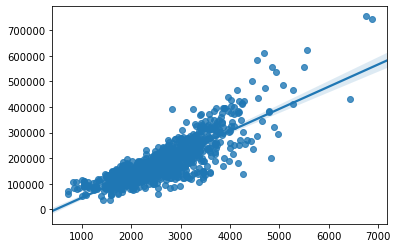

In [13]:
sns.regplot(x = X_train,
            y = Y_train)

## Linear regression with Keras

In [14]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [15]:
from tensorflow.keras.layers import Input
model.add(Input(shape=X_train.shape[1:]))

In [16]:
from tensorflow.keras.layers import Dense
model.add(Dense(1))

In [17]:
loss = 'mse'

In [18]:
from tensorflow.keras.optimizers import SGD
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))

In [20]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 100 # how many iterations over the whole dataset
history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1166 samples
Epoch 1/100
1166/1166 [==============================] - 0s 342us/sample - loss: 39210405888.0000
Epoch 2/100
1166/1166 [==============================] - 0s 1us/sample - loss: 39061647360.0000
Epoch 3/100
1166/1166 [==============================] - 0s 2us/sample - loss: 38913466368.0000
Epoch 4/100
1166/1166 [==============================] - 0s 2us/sample - loss: 38765891584.0000
Epoch 5/100
1166/1166 [==============================] - 0s 2us/sample - loss: 38618902528.0000
Epoch 6/100
1166/1166 [==============================] - 0s 2us/sample - loss: 38472495104.0000
Epoch 7/100
1166/1166 [==============================] - 0s 7us/sample - loss: 38326685696.0000
Epoch 8/100
1166/1166 [==============================] - 0s 3us/sample - loss: 38181449728.0000
Epoch 9/100
1166/1166 [==============================] - 0s 2us/sample - loss: 38036795392.0000
Epoch 10/100
1166/1166 [==============================] - 0s 2us/sample - loss: 37892718592.0000
Epoch 11/100
11

Epoch 86/100
1166/1166 [==============================] - 0s 7us/sample - loss: 28470994944.0000
Epoch 87/100
1166/1166 [==============================] - 0s 3us/sample - loss: 28365142016.0000
Epoch 88/100
1166/1166 [==============================] - 0s 7us/sample - loss: 28259721216.0000
Epoch 89/100
1166/1166 [==============================] - 0s 2us/sample - loss: 28154712064.0000
Epoch 90/100
1166/1166 [==============================] - 0s 3us/sample - loss: 28050122752.0000
Epoch 91/100
1166/1166 [==============================] - 0s 2us/sample - loss: 27945953280.0000
Epoch 92/100
1166/1166 [==============================] - 0s 3us/sample - loss: 27842203648.0000
Epoch 93/100
1166/1166 [==============================] - 0s 2us/sample - loss: 27738861568.0000
Epoch 94/100
1166/1166 [==============================] - 0s 2us/sample - loss: 27635941376.0000
Epoch 95/100
1166/1166 [==============================] - 0s 2us/sample - loss: 27533426688.0000
Epoch 96/100
1166/1166 [======

Standardize data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

We need to rebuild the model

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


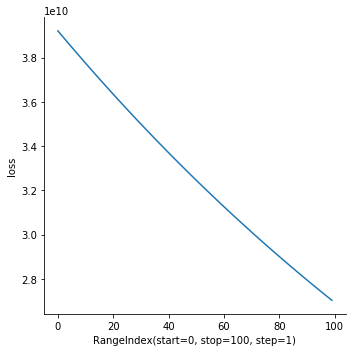

In [21]:
hist = pd.DataFrame(history.history)
sns.relplot(x=hist.index, y="loss", kind="line", data=hist)

In [22]:
Y_test['SalePrice'] = model.predict(x=X_test)

In [23]:
Y_test

,Id,SalePrice
0,1461,21748472.0
1,1462,32496382.0
2,1463,31262814.0
3,1464,30933050.0
4,1465,31299456.0
...,...,...
1454,2915,20038576.0
1455,2916,20038576.0
1456,2917,29931540.0
1457,2918,23018680.0


Send to csv file

In [24]:
Y_test.to_csv('./sources/kaggle_sub.csv', index=False)

###  Kaggle submission

In [25]:

import kaggle

OSError: Could not find kaggle.json. Make sure it's located in /home/jovyan/.kaggle. Or use the environment method.